In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/datadig

/content/drive/MyDrive/datadig


首先处理第一个表格人均可支配收入。观察发现这个表格没有缺失项，只需进行异常分析。

In [ ]:
import pandas as pd
import numpy as np

# 加载人均可支配收入数据并跳过标题行
file_path = 'A_data/生活水平.xlsx'
income_data = pd.read_excel(file_path, sheet_name='人均可支配收入', skiprows=1)

# 方法1: 行内IQR（四分位）法
def row_iqr_outliers(data):
    outliers = {}
    for idx, row in data.iterrows():
        city = row["城市名称"]
        Q1 = row[1:].quantile(0.25)
        Q3 = row[1:].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[city] = row[1:][(row[1:] < lower_bound) | (row[1:] > upper_bound)]
    return outliers

iqr_outliers = row_iqr_outliers(income_data)
print("行内IQR法检测到的异常值：")
for city, outlier_data in iqr_outliers.items():
    if not outlier_data.empty:
        print(f"{city} 城市的异常年份及收入:\n{outlier_data}\n")

# 方法2: 行内Z分数法
def row_z_score_outliers(data):
    outliers = {}
    for idx, row in data.iterrows():
        city = row["城市名称"]
        mean = row[1:].mean()
        std = row[1:].std()
        z_scores = (row[1:] - mean) / std
        outliers[city] = row[1:][z_scores.abs() > 3]
    return outliers

z_score_outliers = row_z_score_outliers(income_data)
print("行内Z分数法检测到的异常值：")
for city, outlier_data in z_score_outliers.items():
    if not outlier_data.empty:
        print(f"{city} 城市的异常年份及收入:\n{outlier_data}\n")


行内IQR法检测到的异常值：
行内Z分数法检测到的异常值：


也就是说第一个表格没有异常值，并且没有数据缺失，也就是第一个表格不用处理（?）

绘制图片如下：

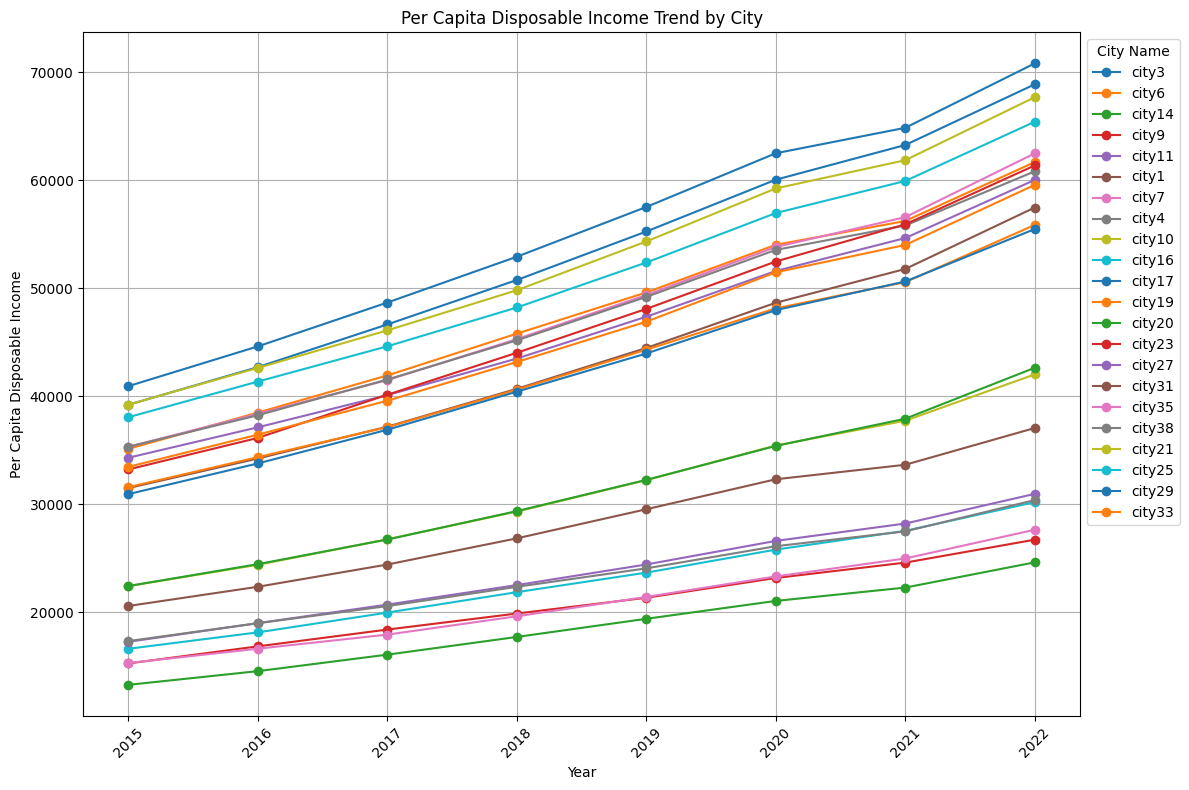

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['NotoSansCJK-Regular']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取Excel文件中的特定工作表
income_data = pd.read_excel('A_data/生活水平.xlsx', sheet_name='人均可支配收入',skiprows=1)

income_data.to_excel('per_income.xlsx', index=False)
income_data.to_csv('per_income.csv', index=False, encoding='utf-8-sig')

# 假设第一列是城市名称，我们需要确保列名正确
city_column = income_data.columns[0]  # 获取第一列作为城市名称列

# 设置图形大小
plt.figure(figsize=(12, 8))

# 遍历每一行数据
for index, row in income_data.iterrows():
    city_name = row[city_column]  # 使用正确的城市名称列
    years = income_data.columns[1:]  # 年份列，跳过城市名称列
    income = row[years]  # 当前城市对应年份的收入数据
    plt.plot(years, income, marker='o', linestyle='-', label=city_name)

# 设置图表标题和轴标签
plt.title("Per Capita Disposable Income Trend by City")
plt.xlabel("Year")
plt.ylabel("Per Capita Disposable Income")

# 设置x轴标签旋转角度，以便更好地显示
plt.xticks(rotation=45)

# 设置图例，标题为'City Name'，位置在图表外部
plt.legend(title='City Name', loc='upper left', bbox_to_anchor=(1, 1))

# 添加网格线
plt.grid()

# 调整布局以防止标签被截断
plt.tight_layout()

# 显示图表
plt.show()

接下来看第二个表格人均消费支出。同样没有缺失数据，因此主要分析数据异常情况：

In [93]:
import pandas as pd
import numpy as np

# 加载人均可支配收入数据并跳过标题行
file_path = 'A_data/生活水平.xlsx'
income_data = pd.read_excel(file_path, sheet_name='人均消费支出', skiprows=1)

# 方法1: 行内IQR（四分位）法
def row_iqr_outliers(data):
    outliers = {}
    for idx, row in data.iterrows():
        city = row["城市名称"]
        Q1 = row[1:].quantile(0.25)
        Q3 = row[1:].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[city] = row[1:][(row[1:] < lower_bound) | (row[1:] > upper_bound)]
    return outliers

iqr_outliers = row_iqr_outliers(income_data)
print("行内IQR法检测到的异常值：")
for city, outlier_data in iqr_outliers.items():
    if not outlier_data.empty:
        print(f"{city} 城市的异常年份及收入:\n{outlier_data}\n")

# 方法2: 行内Z分数法
def row_z_score_outliers(data):
    outliers = {}
    for idx, row in data.iterrows():
        city = row["城市名称"]
        mean = row[1:].mean()
        std = row[1:].std()
        z_scores = (row[1:] - mean) / std
        outliers[city] = row[1:][z_scores.abs() > 3]
    return outliers

z_score_outliers = row_z_score_outliers(income_data)
print("行内Z分数法检测到的异常值：")
for city, outlier_data in z_score_outliers.items():
    if not outlier_data.empty:
        print(f"{city} 城市的异常年份及收入:\n{outlier_data}\n")


行内IQR法检测到的异常值：
city21 城市的异常年份及收入:
2022    446007
Name: 19, dtype: object

行内Z分数法检测到的异常值：


根据IQR方法找到了一个异常值，2022年的city21，别的数据都在万级别，它直接跳转到十万级别，显然不合理，观察发现可能是多打了一位，因此修正后绘制人均消费支出的表格如下：

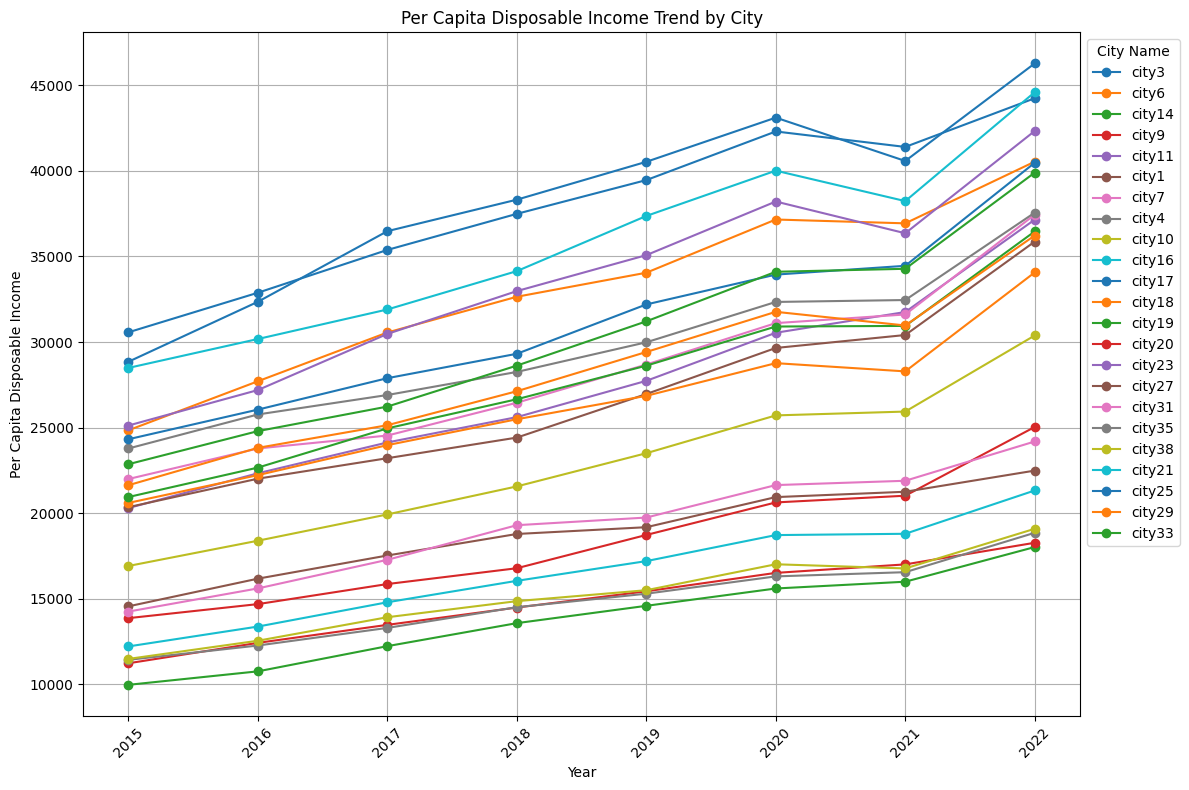

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# 读取Excel文件中的特定工作表
income_data = pd.read_excel('A_data/生活水平.xlsx', sheet_name='人均消费支出',skiprows=1)
income_data.loc[(income_data["城市名称"] == "city21"), 2022] = 44600

income_data.to_excel('per_consumption.xlsx', index=False)
income_data.to_csv('per_consumption.csv', index=False, encoding='utf-8-sig')

city_column = income_data.columns[0]  # 获取第一列作为城市名称列

# 设置图形大小
plt.figure(figsize=(12, 8))

# 遍历每一行数据
for index, row in income_data.iterrows():
    city_name = row[city_column]  # 使用正确的城市名称列
    years = income_data.columns[1:]  # 年份列，跳过城市名称列
    income = row[years]  # 当前城市对应年份的收入数据
    plt.plot(years, income, marker='o', linestyle='-', label=city_name)

# 设置图表标题和轴标签
plt.title("Per Capita Disposable Income Trend by City")
plt.xlabel("Year")
plt.ylabel("Per Capita Disposable Income")

# 设置x轴标签旋转角度，以便更好地显示
plt.xticks(rotation=45)

# 设置图例，标题为'City Name'，位置在图表外部
plt.legend(title='City Name', loc='upper left', bbox_to_anchor=(1, 1))

# 添加网格线
plt.grid()

# 调整布局以防止标签被截断
plt.tight_layout()

# 显示图表
plt.show()

第三个表格城镇居民消费支出出现了缺失值，先补全缺失值，再进行异常查找。

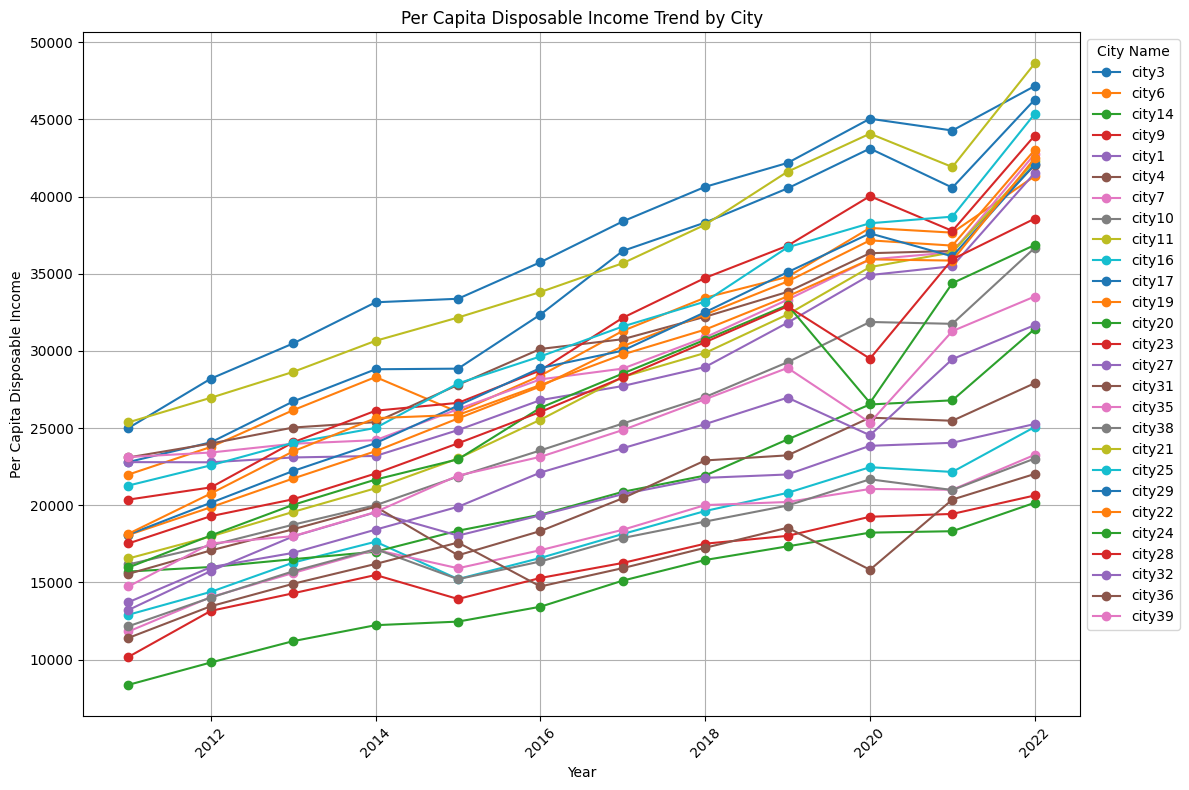

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# 1. 读取数据
file_path = 'A_data/生活水平.xlsx'
consumption_data = pd.read_excel(file_path, sheet_name='城镇居民消费支出', skiprows=1)

# 2. 数据预处理
# 2. 删除非缺失值少于五个的行
consumption_data = consumption_data.dropna(thresh=5)
# 提取城市名称和年份
cities = consumption_data["城市名称"]
years = consumption_data.columns[1:]

# 3. 对每个城市进行二次多项式回归，只补全缺失值
for city in cities:
    city_data = consumption_data[consumption_data["城市名称"] == city].iloc[:, 1:].values.flatten()

    # 创建年份的数值型数据（例如 2015 -> 0, 2016 -> 1,...）
    x = np.arange(len(years)).reshape(-1, 1)
    y = city_data.copy()  # 复制数据以保留原始数据

    # 处理缺失值
    if np.any(np.isnan(y)):
        # 使用非缺失值来训练模型
        mask = ~np.isnan(y)
        x_train = x[mask]
        y_train = y[mask]

        # 创建二次多项式回归模型
        model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

        # 拟合模型
        model.fit(x_train, y_train)

        # 预测缺失值
        y_pred = model.predict(x)
        # 用预测值填补缺失值
        y[mask == False] = y_pred[mask == False]

        # 将补全后的数据写回原数据框
        consumption_data.loc[consumption_data["城市名称"] == city, years] = y

# 4. 保存结果
consumption_data.to_excel('urban_residents_consumption.xlsx', index=False)
consumption_data.to_csv('urban_residents_consumption.csv', index=False, encoding='utf-8-sig')
# 设置图表标题和轴标签
# 设置图形大小
plt.figure(figsize=(12, 8))
# 遍历每一行数据
for index, row in consumption_data.iterrows():
    city_name = row[city_column]  # 使用正确的城市名称列
    years = consumption_data.columns[1:]  # 年份列，跳过城市名称列
    income = row[years]  # 当前城市对应年份的收入数据
    plt.plot(years, income, marker='o', linestyle='-', label=city_name)

# 设置图表标题和轴标签
plt.title("Per Capita Disposable Income Trend by City")
plt.xlabel("Year")
plt.ylabel("Per Capita Disposable Income")

# 设置x轴标签旋转角度，以便更好地显示
plt.xticks(rotation=45)

# 设置图例，标题为'City Name'，位置在图表外部
plt.legend(title='City Name', loc='upper left', bbox_to_anchor=(1, 1))

# 添加网格线
plt.grid()

# 调整布局以防止标签被截断
plt.tight_layout()

# 显示图表
plt.show()


农村居民消费支出表格：有缺失的数据，同理，先用插值法补全缺失数据：

缺失数据补全完成，已保存为 '补全后的农村居民消费支出.xlsx'


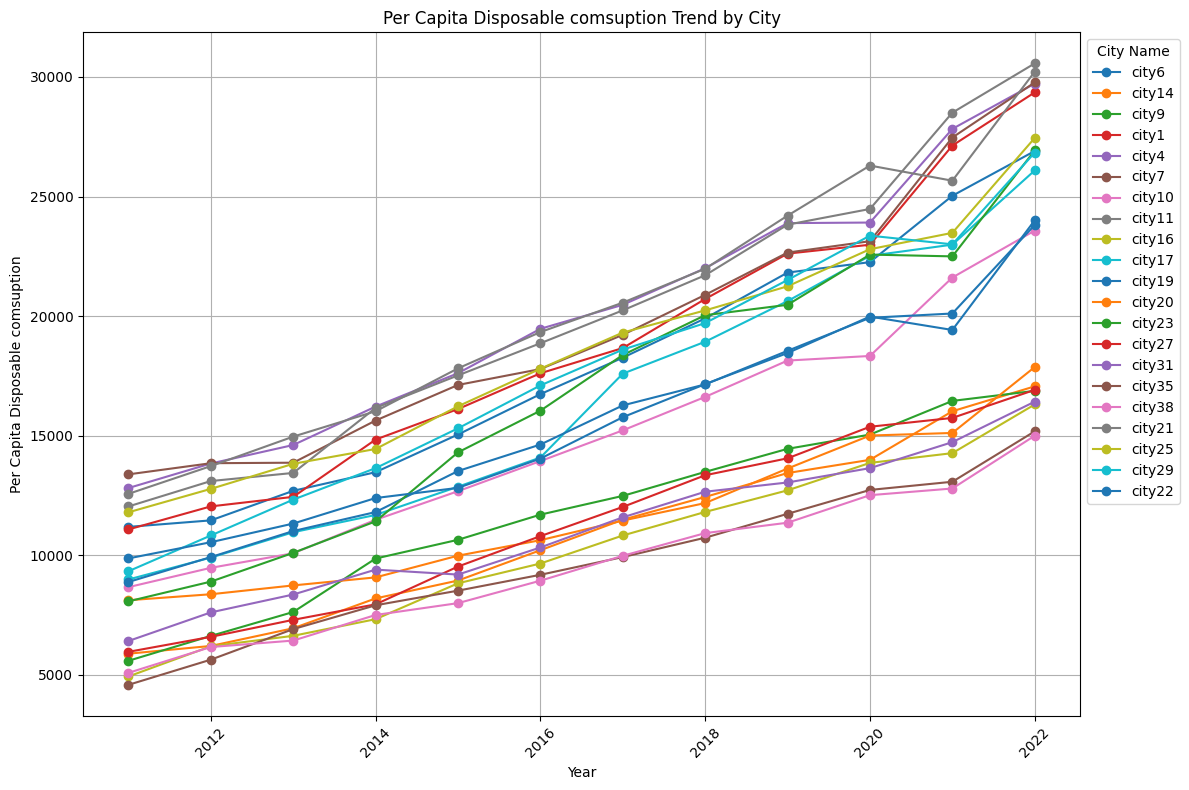

In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# 1. 读取数据
file_path = 'A_data/生活水平.xlsx'
consumption_data = pd.read_excel(file_path, sheet_name='农村居民消费支出', skiprows=1)

# 2. 数据预处理
# 2. 删除非缺失值少于五个的行
consumption_data = consumption_data.dropna(thresh=5)
# 提取城市名称和年份
cities = consumption_data["城市名称"]
years = consumption_data.columns[1:]

# 3. 对每个城市进行二次多项式回归，只补全缺失值
for city in cities:
    city_data = consumption_data[consumption_data["城市名称"] == city].iloc[:, 1:].values.flatten()

    # 创建年份的数值型数据（例如 2015 -> 0, 2016 -> 1,...）
    x = np.arange(len(years)).reshape(-1, 1)
    y = city_data.copy()  # 复制数据以保留原始数据

    # 处理缺失值
    if np.any(np.isnan(y)):
        # 使用非缺失值来训练模型
        mask = ~np.isnan(y)
        x_train = x[mask]
        y_train = y[mask]

        # 创建二次多项式回归模型
        model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

        # 拟合模型
        model.fit(x_train, y_train)

        # 预测缺失值
        y_pred = model.predict(x)
        # 用预测值填补缺失值
        y[mask == False] = y_pred[mask == False]

        # 将补全后的数据写回原数据框
        consumption_data.loc[consumption_data["城市名称"] == city, years] = y

# 4. 保存结果
consumption_data.to_excel('rural_residents_consumption.xlsx', index=False)
print("缺失数据补全完成，已保存为 '补全后的农村居民消费支出.xlsx'")
consumption_data.to_csv('rural_residents_consumption.csv', index=False, encoding='utf-8-sig')

# 设置图表标题和轴标签
# 设置图形大小
plt.figure(figsize=(12, 8))
# 遍历每一行数据
for index, row in consumption_data.iterrows():
    city_name = row[city_column]  # 使用正确的城市名称列
    years = consumption_data.columns[1:]  # 年份列，跳过城市名称列
    income = row[years]  # 当前城市对应年份的收入数据
    plt.plot(years, income, marker='o', linestyle='-', label=city_name)

# 设置图表标题和轴标签
plt.title("Per Capita Disposable comsuption Trend by City")
plt.xlabel("Year")
plt.ylabel("Per Capita Disposable comsuption")

# 设置x轴标签旋转角度，以便更好地显示
plt.xticks(rotation=45)

# 设置图例，标题为'City Name'，位置在图表外部
plt.legend(title='City Name', loc='upper left', bbox_to_anchor=(1, 1))

# 添加网格线
plt.grid()

# 调整布局以防止标签被截断
plt.tight_layout()

# 显示图表
plt.show()
